<a href="https://colab.research.google.com/github/diogojfr/HMCOp-for-voltage-sag-assesment/blob/main/danish_api_consuming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd


In [ ]:
try:
  response = requests.request("POST", url=url,
                                  data=payload,
                                  headers=headers)
except requests.exceptions.HTTPError as errh:
  print('Http Error:', errh)
except requests.exceptions.ConnectionError as errc:
  print('Error connecting:',errc)
except requests.exceptions.RequestException as err:
  print('Oops: Something else', err)


Error connecting: HTTPSConnectionPool(host='integra.ons.org.br', port=443): Max retries exceeded with url: /api/autenticar (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1007)')))


### **API from Danish Gov**

In [ ]:
dataset_name = "ProductionConsumptionSettlement"
url = "https://api.energidataservice.dk/dataset/{}?start=2024-01-23T00:00&end=2024-01-23T23:00".format(dataset_name)
#url = "https://api.energidataservice.dk/dataset/CO2Emis?start=2022-01-01T00:00&end=2022-01-01T01:00&limit=4"

In [ ]:
response = requests.get(url)

In [ ]:
response.status_code

200

In [ ]:
response.content

b'{"total":46,"dataset":"ProductionConsumptionSettlement","records":[{"HourUTC":"2024-01-23T21:00:00","HourDK":"2024-01-23T22:00:00","PriceArea":"DK1","CentralPowerMWh":392.560765,"LocalPowerMWh":120.546627,"CommercialPowerMWh":67.723013,"LocalPowerSelfConMWh":23.726062,"OffshoreWindLt100MW_MWh":232.942384,"OffshoreWindGe100MW_MWh":1065.907886,"OnshoreWindLt50kW_MWh":14.919255,"OnshoreWindGe50kW_MWh":3254.200043,"HydroPowerMWh":4.482915,"SolarPowerLt10kW_MWh":0.161772,"SolarPowerGe10Lt40kW_MWh":0.062864,"SolarPowerGe40kW_MWh":0.081126,"SolarPowerSelfConMWh":0.000000,"UnknownProdMWh":0.009048,"ExchangeNO_MWh":-1669.926000,"ExchangeSE_MWh":12.627000,"ExchangeGE_MWh":263.637800,"ExchangeNL_MWh":-0.594000,"ExchangeGB_MWh":-1209.992070,"ExchangeGreatBelt_MWh":542.300000,"GrossConsumptionMWh":3115.376490,"GridLossTransmissionMWh":108.992622,"GridLossInterconnectorsMWh":72.583000,"GridLossDistributionMWh":160.379031,"PowerToHeatMWh":197.049758},{"HourUTC":"2024-01-23T21:00:00","HourDK":"2024-

In [ ]:
output = response.json()
output

{'total': 46,
 'dataset': 'ProductionConsumptionSettlement',
 'records': [{'HourUTC': '2024-01-23T21:00:00',
   'HourDK': '2024-01-23T22:00:00',
   'PriceArea': 'DK1',
   'CentralPowerMWh': 392.560765,
   'LocalPowerMWh': 120.546627,
   'CommercialPowerMWh': 67.723013,
   'LocalPowerSelfConMWh': 23.726062,
   'OffshoreWindLt100MW_MWh': 232.942384,
   'OffshoreWindGe100MW_MWh': 1065.907886,
   'OnshoreWindLt50kW_MWh': 14.919255,
   'OnshoreWindGe50kW_MWh': 3254.200043,
   'HydroPowerMWh': 4.482915,
   'SolarPowerLt10kW_MWh': 0.161772,
   'SolarPowerGe10Lt40kW_MWh': 0.062864,
   'SolarPowerGe40kW_MWh': 0.081126,
   'SolarPowerSelfConMWh': 0.0,
   'UnknownProdMWh': 0.009048,
   'ExchangeNO_MWh': -1669.926,
   'ExchangeSE_MWh': 12.627,
   'ExchangeGE_MWh': 263.6378,
   'ExchangeNL_MWh': -0.594,
   'ExchangeGB_MWh': -1209.99207,
   'ExchangeGreatBelt_MWh': 542.3,
   'GrossConsumptionMWh': 3115.37649,
   'GridLossTransmissionMWh': 108.992622,
   'GridLossInterconnectorsMWh': 72.583,
   'Grid

In [ ]:
dados = output['records']
dados[:2]

[{'HourUTC': '2024-01-23T21:00:00',
  'HourDK': '2024-01-23T22:00:00',
  'PriceArea': 'DK1',
  'CentralPowerMWh': 392.560765,
  'LocalPowerMWh': 120.546627,
  'CommercialPowerMWh': 67.723013,
  'LocalPowerSelfConMWh': 23.726062,
  'OffshoreWindLt100MW_MWh': 232.942384,
  'OffshoreWindGe100MW_MWh': 1065.907886,
  'OnshoreWindLt50kW_MWh': 14.919255,
  'OnshoreWindGe50kW_MWh': 3254.200043,
  'HydroPowerMWh': 4.482915,
  'SolarPowerLt10kW_MWh': 0.161772,
  'SolarPowerGe10Lt40kW_MWh': 0.062864,
  'SolarPowerGe40kW_MWh': 0.081126,
  'SolarPowerSelfConMWh': 0.0,
  'UnknownProdMWh': 0.009048,
  'ExchangeNO_MWh': -1669.926,
  'ExchangeSE_MWh': 12.627,
  'ExchangeGE_MWh': 263.6378,
  'ExchangeNL_MWh': -0.594,
  'ExchangeGB_MWh': -1209.99207,
  'ExchangeGreatBelt_MWh': 542.3,
  'GrossConsumptionMWh': 3115.37649,
  'GridLossTransmissionMWh': 108.992622,
  'GridLossInterconnectorsMWh': 72.583,
  'GridLossDistributionMWh': 160.379031,
  'PowerToHeatMWh': 197.049758},
 {'HourUTC': '2024-01-23T21:00:0

In [ ]:
df = pd.DataFrame(dados)
df.head()

,HourUTC,HourDK,PriceArea,CentralPowerMWh,LocalPowerMWh,CommercialPowerMWh,LocalPowerSelfConMWh,OffshoreWindLt100MW_MWh,OffshoreWindGe100MW_MWh,OnshoreWindLt50kW_MWh,...,ExchangeSE_MWh,ExchangeGE_MWh,ExchangeNL_MWh,ExchangeGB_MWh,ExchangeGreatBelt_MWh,GrossConsumptionMWh,GridLossTransmissionMWh,GridLossInterconnectorsMWh,GridLossDistributionMWh,PowerToHeatMWh
0,2024-01-23T21:00:00,2024-01-23T22:00:00,DK1,392.560765,120.546627,67.723013,23.726062,232.942384,1065.907886,14.919255,...,12.62700,263.637800,-0.594,-1209.992070,542.3,3115.376490,108.992622,72.583000,160.379031,197.049758
1,2024-01-23T21:00:00,2024-01-23T22:00:00,DK2,310.294685,41.027730,201.808670,16.025652,26.510700,881.622028,1.173683,...,894.14800,-643.430992,NaN,NaN,-551.2,1698.720216,53.954866,22.801492,86.456822,19.724750
2,2024-01-23T20:00:00,2024-01-23T21:00:00,DK1,531.577089,142.155786,75.941810,22.872853,236.626621,1061.410289,13.660954,...,-256.97300,656.142300,-0.576,-1446.937637,430.3,3129.090994,102.315923,53.982900,152.125486,180.229133
3,2024-01-23T20:00:00,2024-01-23T21:00:00,DK2,302.310020,51.881214,200.064816,15.667810,27.323400,875.868875,0.952959,...,1018.87925,-673.356000,NaN,NaN,-436.6,1854.741286,51.194096,14.236000,89.861625,64.717820
4,2024-01-23T19:00:00,2024-01-23T20:00:00,DK1,590.376333,204.035697,82.400525,21.559674,227.346297,1020.418404,11.731103,...,1.98800,444.071200,-0.621,-1456.773883,264.5,3126.883765,90.974129,29.770600,143.908229,99.314505


In [ ]:
import matplotlib.pyplot as plt

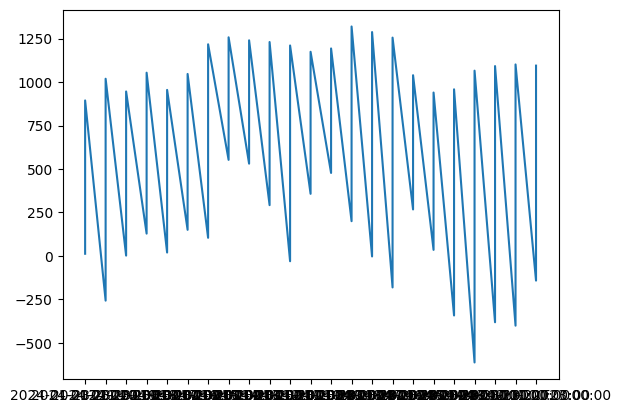

In [ ]:
plt.plot(df['HourUTC'],df['ExchangeSE_MWh'])
plt.show()